In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('bank-additional-full.csv')

In [3]:
pd.options.display.max_columns = None


In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# imbalance data

In [5]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

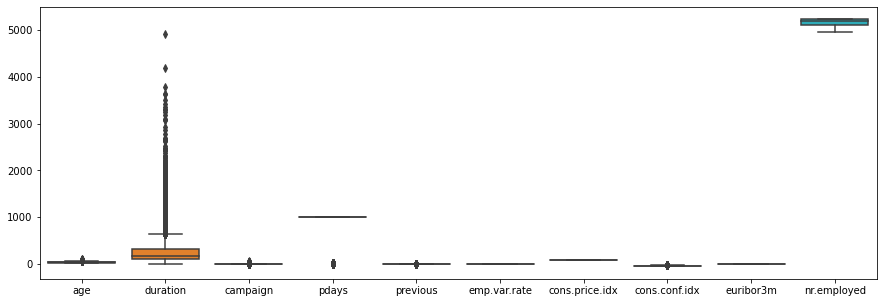

In [7]:
plt.rcParams['figure.figsize'] = [15,5]
sns.boxplot(data = data)


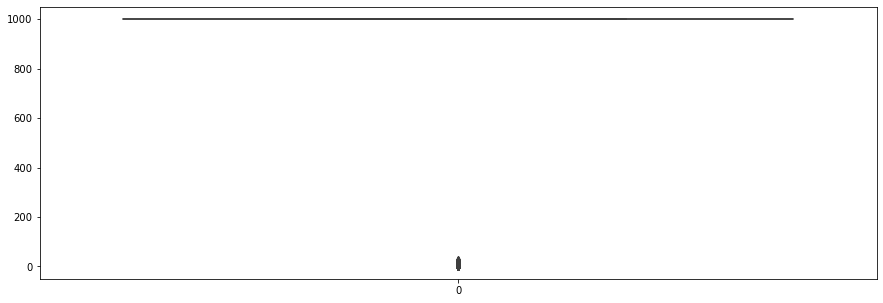

In [8]:
sns.boxplot(data = data['pdays'])

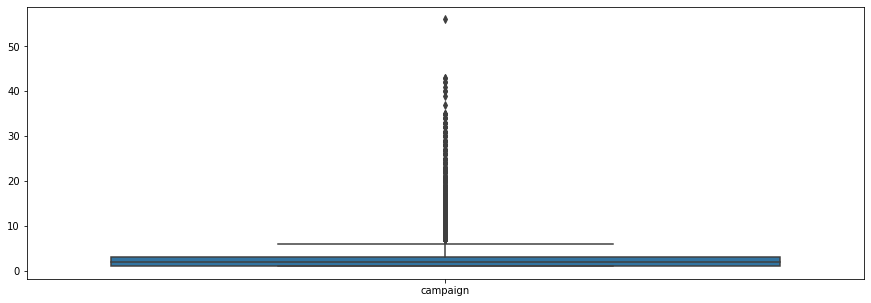

In [9]:
sns.boxplot(data = data[['campaign']])

In [10]:
data.shape

(41188, 21)

In [11]:
data.dtypes.head()

age           int64
job          object
marital      object
education    object
default      object
dtype: object

# FUNCTIONS

In [12]:
def shape(x_train,x_test,y_train,y_test):
    print('x_train', x_train.shape)
    print('x_test', x_test.shape)
    print('y_train', y_train.shape)
    print('y_test', y_test.shape)


In [13]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
def confuse_matrices(model):
    cm = confusion_matrix(y_test,y_predict)
    cm_df = pd.DataFrame(data = cm,columns=['predict_1', 'predict_0'], index = ['actual_1','actual_0'])
    sns.heatmap(data = cm_df, annot= True, cbar= False,fmt = 'd',annot_kws = {'size':25}, cmap = ListedColormap(['lightskyblue']),linewidths = 0.5)

In [14]:
from sklearn.metrics import classification_report
def report(model):
    s = print(classification_report(y_test,y_predict))
    return s

In [15]:
def y_predicts(y_predict):
    y_predict = pd.DataFrame(data = y_predict, columns = ['y_predict'])
    y_predict = y_predict.replace(['yes','no'],[1,0])
    return y_predict

In [16]:
def y_tests(y_test):
    y_test = pd.DataFrame(data = y_test, columns = ['y_test'])
    y_test = y_test.replace(['yes','no'],[1,0])
    return y_test

In [17]:
from sklearn.metrics import roc_curve,roc_auc_score
def auc(model):
    fpr,tpr,threshold = roc_curve(y_test,y_predict)
    plt.plot([0,1],[0,1], 'r--')
    plt.plot(fpr,tpr)
    plt.text(x = 0.0,y = 0.9, s = ('roc_auc_score :', roc_auc_score(y_test,y_predict)) )

In [18]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,cohen_kappa_score,roc_auc_score
def scores(model):
    print('accuracy_score -', metrics.accuracy_score(y_test,y_predict))
    print('f1_score -', metrics.f1_score(y_test,y_predict))
    print('precision_score -',metrics.precision_score(y_test,y_predict))
    print('recall_score -',metrics.recall_score(y_test,y_predict))
    print('cohen_kappa_score -',metrics.cohen_kappa_score(y_test,y_predict))
    print('roc_auc_score -',metrics.roc_auc_score(y_test,y_predict))

In [19]:
def results(models):
    result = pd.DataFrame({'models':['svc_model'],
                      'accuracy_score': [metrics.accuracy_score(y_test,y_predict)],
                      'f1_score':[metrics.f1_score(y_test,y_predict)],
                      'precision_score':[metrics.precision_score(y_test,y_predict)],
                      'recall_score':[metrics.recall_score(y_test,y_predict)],
                      'cohen_kappa_score':[metrics.cohen_kappa_score(y_test,y_predict)],
                      'roc_auc_score':[metrics.roc_auc_score(y_test,y_predict)]})
    res = pd.DataFrame( columns= ['models','accuracy_score','f1_score','precision_score','recall_score','cohen_kappa_score','roc_auc_score'])
    res = res.append(result)
    return res

# changing into balancing data

In [20]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [21]:
x = data.drop(['y'], axis = 1)
y = pd.DataFrame(data['y'])

In [22]:
from imblearn.over_sampling import RandomOverSampler
random = RandomOverSampler(random_state=1)
x_sampled,y_sampled = random.fit_resample(x,y)

In [23]:
print(x_sampled.shape, y_sampled.shape)

(73096, 20) (73096, 1)


In [24]:
str_data = x_sampled.select_dtypes(include= object)
num_data = x_sampled.select_dtypes(include = np.number)

In [25]:
print(str_data.shape, num_data.shape)

(73096, 10) (73096, 10)


In [26]:
dummy_str = pd.get_dummies(str_data, drop_first= True)

In [27]:
data_ind = pd.concat([dummy_str,num_data], axis = 1)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data_ind,y_sampled,test_size = 0.3, random_state= 1)


In [29]:
shape(x_train,x_test,y_train,y_test)

x_train (51167, 53)
x_test (21929, 53)
y_train (51167, 1)
y_test (21929, 1)


# MODEL - 1 SVM CLASSIFIER WITH KERNAL = LINEAR

In [30]:
from sklearn.svm import SVC

In [31]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(x_train,y_train)

C:\Users\HARI KRISHNA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [32]:
y_predict = svc_model.predict(x_test)
y_predict

array(['no', 'yes', 'yes', ..., 'no', 'yes', 'no'], dtype=object)

In [33]:
y_predict = pd.DataFrame(data = y_predict, columns = ['y_predict'])

In [34]:
y_predict = y_predicts(y_predict)

In [42]:
y_test = y_test.replace(['yes','no'],[1,0])

In [43]:
y_test = y_tests(y_test)

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

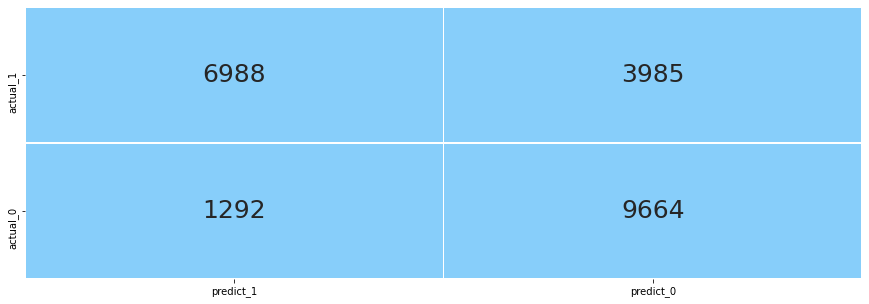

In [44]:
confuse_matrices(svc_model)

In [45]:
report(svc_model)

              precision    recall  f1-score   support

           0       0.84      0.64      0.73     10973
           1       0.71      0.88      0.79     10956

    accuracy                           0.76     21929
   macro avg       0.78      0.76      0.76     21929
weighted avg       0.78      0.76      0.76     21929



In [46]:
from sklearn.metrics import roc_curve,roc_auc_score
def auc(model):
    fpr,tpr,threshold = roc_curve(y_test,y_predict)
    plt.plot([0,1],[0,1], 'r--')
    plt.plot(fpr,tpr)
    plt.text(x = 0.0,y = 0.9, s = ('roc_auc_score :', roc_auc_score(y_test,y_predict)))

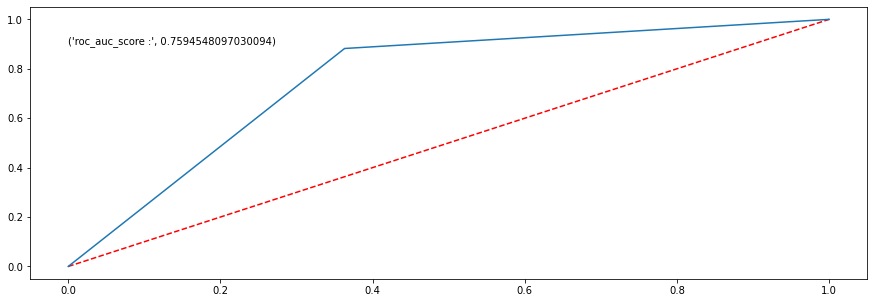

In [47]:
auc(svc_model)

In [48]:
from sklearn import metrics
scores(svc_model)

accuracy_score - 0.7593597519266725
f1_score - 0.7855313960577118
precision_score - 0.7080372188438714
recall_score - 0.882073749543629
cohen_kappa_score - 0.5188108353363557
roc_auc_score - 0.7594548097030094


In [49]:
def results(models):
    result = pd.DataFrame({'models':[model],
                      'accuracy_score': [metrics.accuracy_score(y_test,y_predict)],
                      'f1_score':[metrics.f1_score(y_test,y_predict)],
                      'precision_score':[metrics.precision_score(y_test,y_predict)],
                      'recall_score':[metrics.recall_score(y_test,y_predict)],
                      'cohen_kappa_score':[metrics.cohen_kappa_score(y_test,y_predict)],
                      'roc_auc_score':[metrics.roc_auc_score(y_test,y_predict)]})
    return result

In [50]:
model = 'suv_model_1'
model_1 = results(svc_model)

In [51]:
model_1

,models,accuracy_score,f1_score,precision_score,recall_score,cohen_kappa_score,roc_auc_score
0,suv_model_1,0.75936,0.785531,0.708037,0.882074,0.518811,0.759455


# MODEL - 2 SVM CLASSIFIER WITH KERNAL = RBF

In [52]:
svc_classifier = SVC(kernel='rbf')
svc_model_2 = svc_classifier.fit(x_train,y_train)

C:\Users\HARI KRISHNA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [53]:
y_predict = svc_model_2.predict(x_test)
y_predict

array(['no', 'yes', 'yes', ..., 'no', 'yes', 'yes'], dtype=object)

In [54]:
y_predict = y_predicts(y_predict)

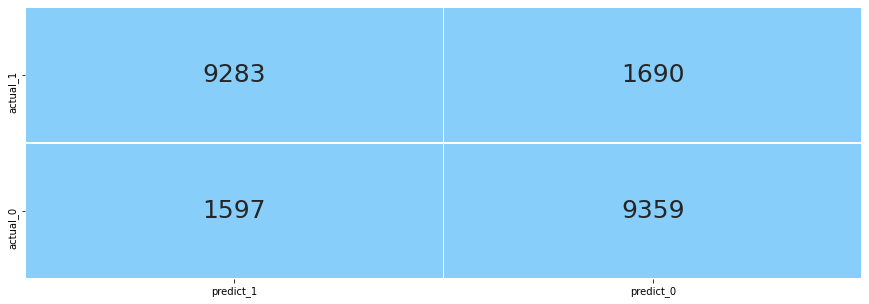

In [55]:
confuse_matrices(svc_model_2)

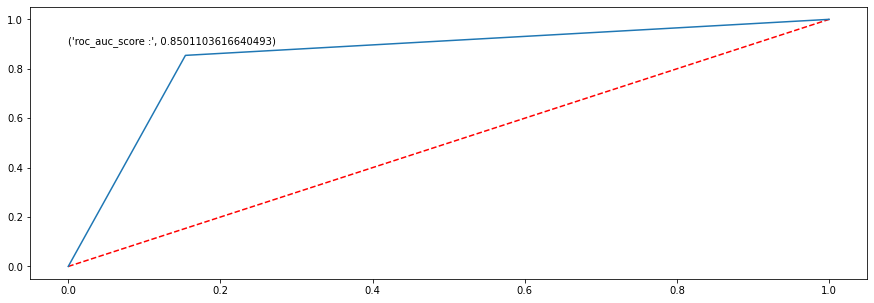

In [56]:
auc(svc_model_2)

In [57]:
report(svc_model_2)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     10973
           1       0.85      0.85      0.85     10956

    accuracy                           0.85     21929
   macro avg       0.85      0.85      0.85     21929
weighted avg       0.85      0.85      0.85     21929



In [58]:
scores(svc_model_2)

accuracy_score - 0.8501071640293675
f1_score - 0.8506248579868212
precision_score - 0.8470449814462847
recall_score - 0.8542351223074115
cohen_kappa_score - 0.7002161191027072
roc_auc_score - 0.8501103616640493


In [59]:
model = 'svc_model_2'
results(svc_model_2)

,models,accuracy_score,f1_score,precision_score,recall_score,cohen_kappa_score,roc_auc_score
0,svc_model_2,0.850107,0.850625,0.847045,0.854235,0.700216,0.85011


In [60]:
model_2 = results(svc_model_2)

In [61]:
model_1 = model_1.append(model_2)

In [62]:
model_1

,models,accuracy_score,f1_score,precision_score,recall_score,cohen_kappa_score,roc_auc_score
0,suv_model_1,0.759360,0.785531,0.708037,0.882074,0.518811,0.759455
0,svc_model_2,0.850107,0.850625,0.847045,0.854235,0.700216,0.850110


In [63]:
result = pd.DataFrame({'models':['svc_model_2'],
                      'accuracy_score': [metrics.accuracy_score(y_test,y_predict)],
                      'f1_score':[metrics.f1_score(y_test,y_predict)],
                      'precision_score':[metrics.precision_score(y_test,y_predict)],
                      'recall_score':[metrics.recall_score(y_test,y_predict)],
                      'cohen_kappa_score':[metrics.cohen_kappa_score(y_test,y_predict)],
                      'roc_auc_score':[metrics.roc_auc_score(y_test,y_predict)]})

# MODEL-3 SVM CLASSIFIER WITH SIGMOID 

In [64]:
svc_classifier = SVC(kernel='sigmoid')
svc_model_3 = svc_classifier.fit(x_train,y_train)

C:\Users\HARI KRISHNA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [65]:
y_predict = svc_model_3.predict(x_test)

In [66]:
y_predict = y_predicts(y_predict)

In [67]:
y_test

,y
5939,0
31144,0
51781,1
38016,1
25814,0
...,...
28770,0
44540,1
16222,0
54326,1


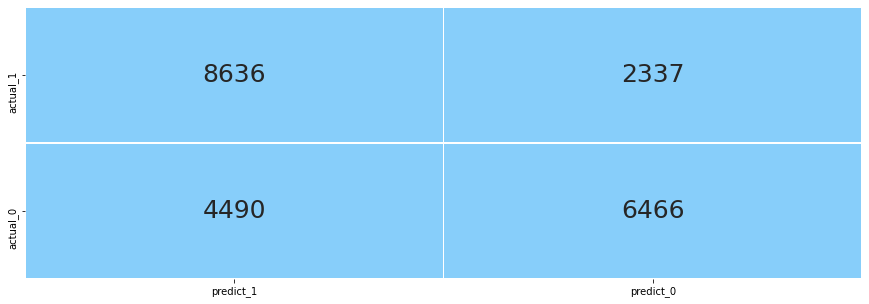

In [68]:
confuse_matrices(svc_model_3)

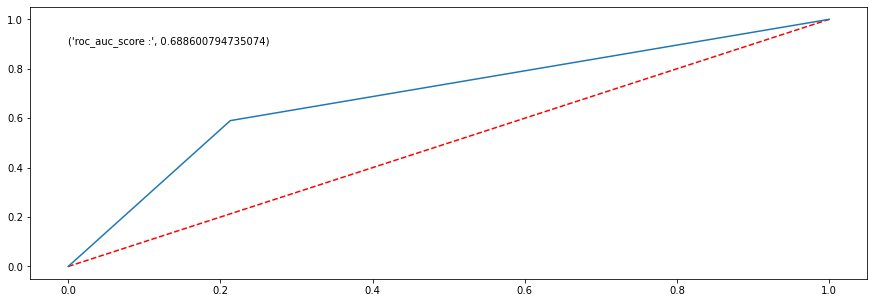

In [69]:
auc(svc_model_3)

In [70]:
from sklearn import metrics
scores(svc_model_3)

accuracy_score - 0.6886770942587441
f1_score - 0.6544865630851764
precision_score - 0.7345223219357038
recall_score - 0.590178897407813
cohen_kappa_score - 0.3772590176672559
roc_auc_score - 0.688600794735074


In [71]:
model_3 = pd.DataFrame({'models':['svc_model_3'],
                      'accuracy_score': [metrics.accuracy_score(y_test,y_predict)],
                      'f1_score':[metrics.f1_score(y_test,y_predict)],
                      'precision_score':[metrics.precision_score(y_test,y_predict)],
                      'recall_score':[metrics.recall_score(y_test,y_predict)],
                      'cohen_kappa_score':[metrics.cohen_kappa_score(y_test,y_predict)],
                      'roc_auc_score':[metrics.roc_auc_score(y_test,y_predict)]})

In [72]:
model_1 = model_1.append(model_3)

In [73]:
model_1

,models,accuracy_score,f1_score,precision_score,recall_score,cohen_kappa_score,roc_auc_score
0,suv_model_1,0.759360,0.785531,0.708037,0.882074,0.518811,0.759455
0,svc_model_2,0.850107,0.850625,0.847045,0.854235,0.700216,0.850110
0,svc_model_3,0.688677,0.654487,0.734522,0.590179,0.377259,0.688601


# MODEL - 4 SVM CLASSIFIER WITH KERNAL POLYNOMIAL KERNAL

In [74]:
svc_classifier = SVC(kernel='poly')
svc_model_4 = svc_classifier.fit(x_train,y_train)

C:\Users\HARI KRISHNA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [75]:
y_predict = svc_model_4.predict(x_test)

In [76]:
y_predict = y_predicts(y_predict)

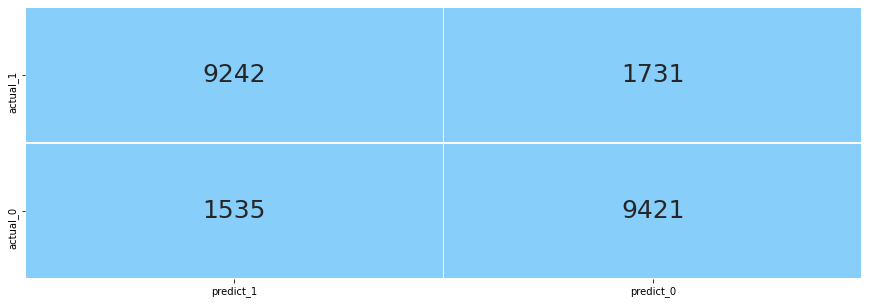

In [77]:
confuse_matrices(svc_model_4)

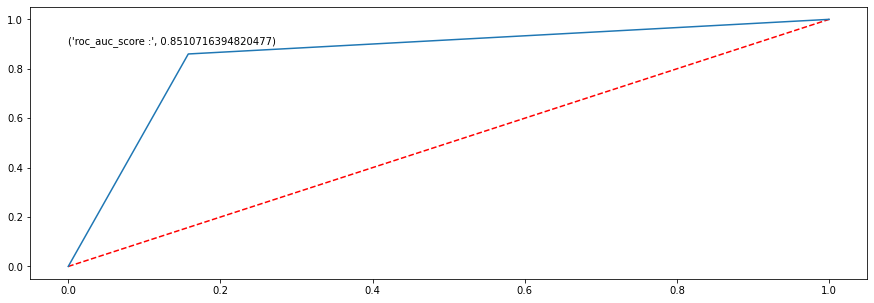

In [78]:
auc(svc_model_4)

In [79]:
scores(svc_model_4)

accuracy_score - 0.8510648000364813
f1_score - 0.8522706712502262
precision_score - 0.8447812051649928
recall_score - 0.8598941219423147
cohen_kappa_score - 0.7021335488637532
roc_auc_score - 0.8510716394820477


In [80]:
model_4 = pd.DataFrame({'models':['svc_model_poly'],
                      'accuracy_score': [metrics.accuracy_score(y_test,y_predict)],
                      'f1_score':[metrics.f1_score(y_test,y_predict)],
                      'precision_score':[metrics.precision_score(y_test,y_predict)],
                      'recall_score':[metrics.recall_score(y_test,y_predict)],
                      'cohen_kappa_score':[metrics.cohen_kappa_score(y_test,y_predict)],
                      'roc_auc_score':[metrics.roc_auc_score(y_test,y_predict)]})

In [81]:
model_4

,models,accuracy_score,f1_score,precision_score,recall_score,cohen_kappa_score,roc_auc_score
0,svc_model_poly,0.851065,0.852271,0.844781,0.859894,0.702134,0.851072


In [82]:
model_1 = model_1.append(model_4)

In [83]:
model_1

,models,accuracy_score,f1_score,precision_score,recall_score,cohen_kappa_score,roc_auc_score
0,suv_model_1,0.759360,0.785531,0.708037,0.882074,0.518811,0.759455
0,svc_model_2,0.850107,0.850625,0.847045,0.854235,0.700216,0.850110
0,svc_model_3,0.688677,0.654487,0.734522,0.590179,0.377259,0.688601
0,svc_model_poly,0.851065,0.852271,0.844781,0.859894,0.702134,0.851072


# MODEL - 5, poly with degree 2

In [84]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel='poly',degree= 2)
svc_model_5 = svc_classifier.fit(x_train,y_train)

C:\Users\HARI KRISHNA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [85]:
y_predict = svc_model_5.predict(x_test)

In [86]:
y_predict = y_predicts(y_predict)


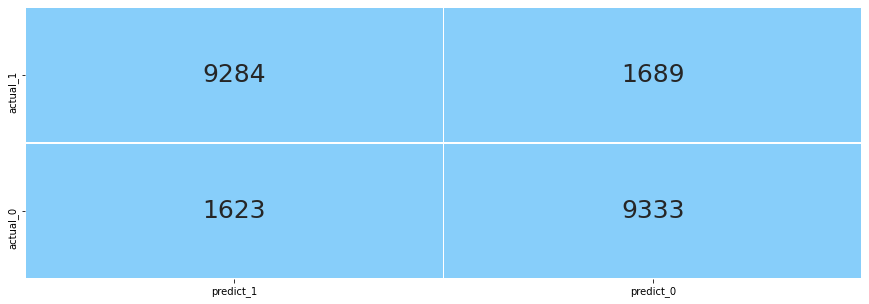

In [87]:
confuse_matrices(svc_model_5)

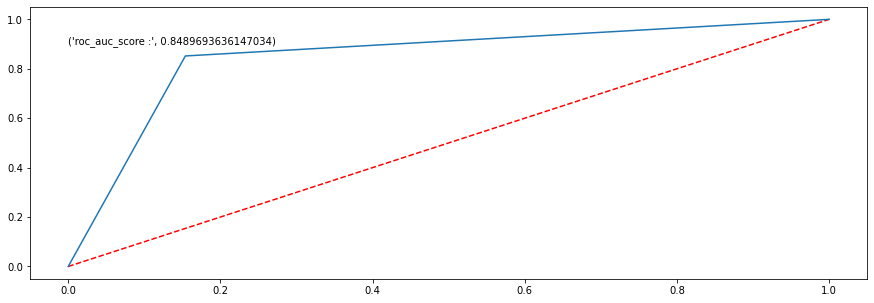

In [88]:
auc(svc_model_5)

In [89]:
from sklearn import metrics
scores(svc_model_5)

accuracy_score - 0.8489671211637557
f1_score - 0.8493038493038493
precision_score - 0.84676102340773
recall_score - 0.8518619934282585
cohen_kappa_score - 0.6979354703571178
roc_auc_score - 0.8489693636147034


In [90]:
model_5 = pd.DataFrame({'models':['svc_model_poly_deg_2'],
                      'accuracy_score': [metrics.accuracy_score(y_test,y_predict)],
                      'f1_score':[metrics.f1_score(y_test,y_predict)],
                      'precision_score':[metrics.precision_score(y_test,y_predict)],
                      'recall_score':[metrics.recall_score(y_test,y_predict)],
                      'cohen_kappa_score':[metrics.cohen_kappa_score(y_test,y_predict)],
                      'roc_auc_score':[metrics.roc_auc_score(y_test,y_predict)]})

In [91]:
model_5

,models,accuracy_score,f1_score,precision_score,recall_score,cohen_kappa_score,roc_auc_score
0,svc_model_poly_deg_2,0.848967,0.849304,0.846761,0.851862,0.697935,0.848969


In [92]:
model_1 = model_1.append(model_5)

In [93]:
model_1

,models,accuracy_score,f1_score,precision_score,recall_score,cohen_kappa_score,roc_auc_score
0,suv_model_1,0.759360,0.785531,0.708037,0.882074,0.518811,0.759455
0,svc_model_2,0.850107,0.850625,0.847045,0.854235,0.700216,0.850110
0,svc_model_3,0.688677,0.654487,0.734522,0.590179,0.377259,0.688601
0,svc_model_poly,0.851065,0.852271,0.844781,0.859894,0.702134,0.851072
0,svc_model_poly_deg_2,0.848967,0.849304,0.846761,0.851862,0.697935,0.848969


# MODEL-6 - logistic regression

In [94]:
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit = logit.fit(x_train,y_train)

In [95]:
y_predict = logit.predict(x_test)

In [96]:
y_predict = y_predicts(y_predict)

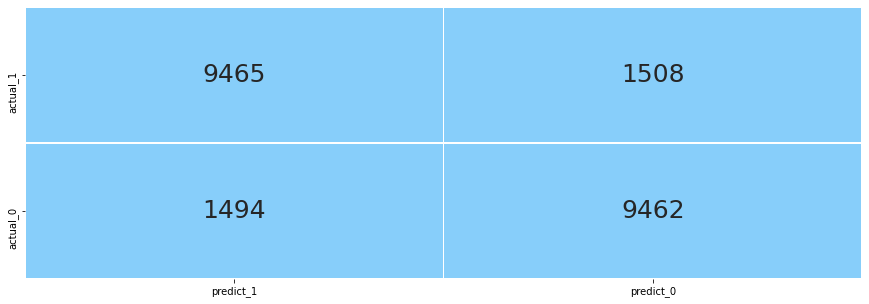

In [97]:
confuse_matrices(logit)

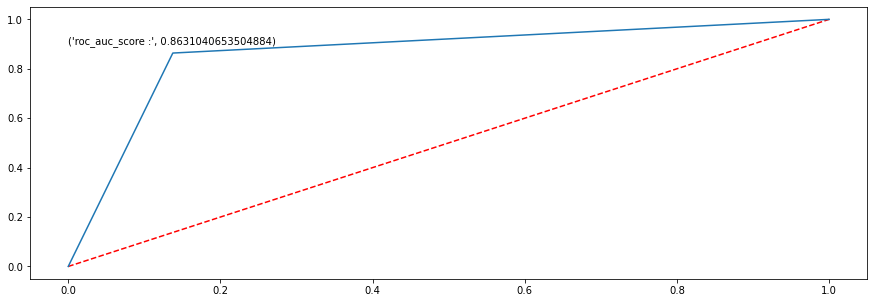

In [98]:
auc(logit)

In [99]:
from sklearn import metrics
scores(logit)

accuracy_score - 0.8631036526973415
f1_score - 0.8630849220103987
precision_score - 0.8625341841385598
recall_score - 0.8636363636363636
cohen_kappa_score - 0.7262074118642868
roc_auc_score - 0.8631040653504884


In [100]:
model_6 = pd.DataFrame({'models':['logit'],
                      'accuracy_score': [metrics.accuracy_score(y_test,y_predict)],
                      'f1_score':[metrics.f1_score(y_test,y_predict)],
                      'precision_score':[metrics.precision_score(y_test,y_predict)],
                      'recall_score':[metrics.recall_score(y_test,y_predict)],
                      'cohen_kappa_score':[metrics.cohen_kappa_score(y_test,y_predict)],
                      'roc_auc_score':[metrics.roc_auc_score(y_test,y_predict)]})

In [101]:
model_6

,models,accuracy_score,f1_score,precision_score,recall_score,cohen_kappa_score,roc_auc_score
0,logit,0.863104,0.863085,0.862534,0.863636,0.726207,0.863104


In [102]:
model_1 = model_1.append(model_6)
model_1

,models,accuracy_score,f1_score,precision_score,recall_score,cohen_kappa_score,roc_auc_score
0,suv_model_1,0.759360,0.785531,0.708037,0.882074,0.518811,0.759455
0,svc_model_2,0.850107,0.850625,0.847045,0.854235,0.700216,0.850110
0,svc_model_3,0.688677,0.654487,0.734522,0.590179,0.377259,0.688601
0,svc_model_poly,0.851065,0.852271,0.844781,0.859894,0.702134,0.851072
0,svc_model_poly_deg_2,0.848967,0.849304,0.846761,0.851862,0.697935,0.848969
0,logit,0.863104,0.863085,0.862534,0.863636,0.726207,0.863104


# MODEL - 7  DESCION TREE

In [103]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
descion_tree_model = DecisionTreeClassifier(criterion='gini',max_depth= 5,max_leaf_nodes=15)

In [104]:
descion_tree_model = descion_tree_model.fit(x_train,y_train)

In [105]:
y_predict = descion_tree_model.predict(x_test)

In [106]:
y_predict = y_predicts(y_predict)

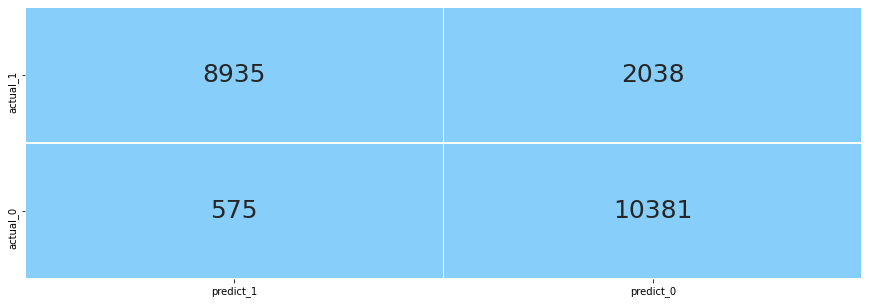

In [107]:
confuse_matrices(descion_tree_model)

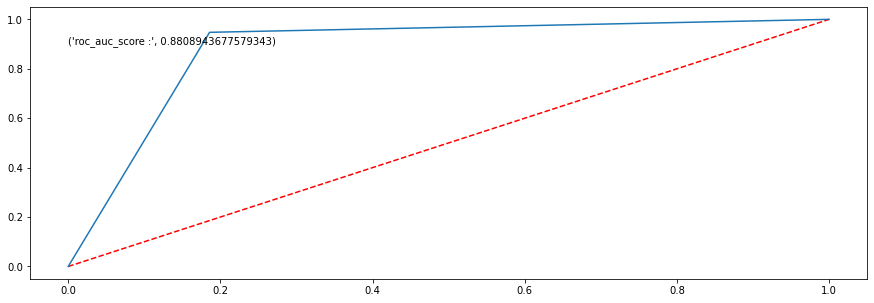

In [108]:
auc(descion_tree_model)

In [109]:
from sklearn import metrics
scores(descion_tree_model)

accuracy_score - 0.8808427196862602
f1_score - 0.8882139037433155
precision_score - 0.835896610033014
recall_score - 0.9475173420956553
cohen_kappa_score - 0.7617099447222825
roc_auc_score - 0.8808943677579343


In [110]:
model_7 = pd.DataFrame({'models':['descion_tree_model'],
                      'accuracy_score': [metrics.accuracy_score(y_test,y_predict)],
                      'f1_score':[metrics.f1_score(y_test,y_predict)],
                      'precision_score':[metrics.precision_score(y_test,y_predict)],
                      'recall_score':[metrics.recall_score(y_test,y_predict)],
                      'cohen_kappa_score':[metrics.cohen_kappa_score(y_test,y_predict)],
                      'roc_auc_score':[metrics.roc_auc_score(y_test,y_predict)]})

In [111]:
model_7

,models,accuracy_score,f1_score,precision_score,recall_score,cohen_kappa_score,roc_auc_score
0,descion_tree_model,0.880843,0.888214,0.835897,0.947517,0.76171,0.880894


In [112]:
model_1 = model_1.append(model_7)
model_1

,models,accuracy_score,f1_score,precision_score,recall_score,cohen_kappa_score,roc_auc_score
0,suv_model_1,0.759360,0.785531,0.708037,0.882074,0.518811,0.759455
0,svc_model_2,0.850107,0.850625,0.847045,0.854235,0.700216,0.850110
0,svc_model_3,0.688677,0.654487,0.734522,0.590179,0.377259,0.688601
0,svc_model_poly,0.851065,0.852271,0.844781,0.859894,0.702134,0.851072
0,svc_model_poly_deg_2,0.848967,0.849304,0.846761,0.851862,0.697935,0.848969
0,logit,0.863104,0.863085,0.862534,0.863636,0.726207,0.863104
0,descion_tree_model,0.880843,0.888214,0.835897,0.947517,0.761710,0.880894


# MODEL - 8 BAGGING

In [113]:
from sklearn.ensemble import BaggingClassifier

In [114]:
bagging = BaggingClassifier(LogisticRegression())
bagging_mdl = bagging.fit(x_train,y_train)

In [115]:
y_predict = bagging_mdl.predict(x_test)

In [116]:
y_predict = y_predicts(y_predict)

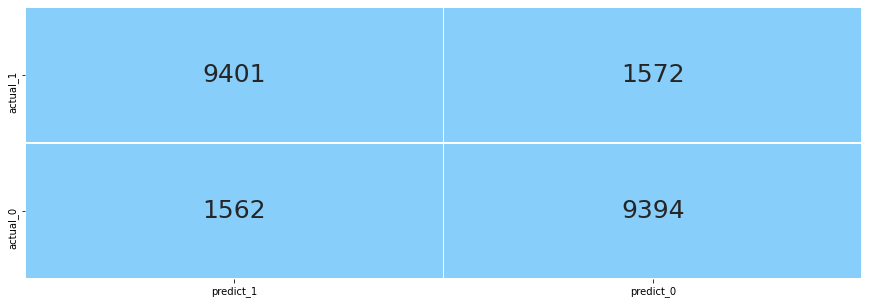

In [117]:
confuse_matrices(bagging_mdl)

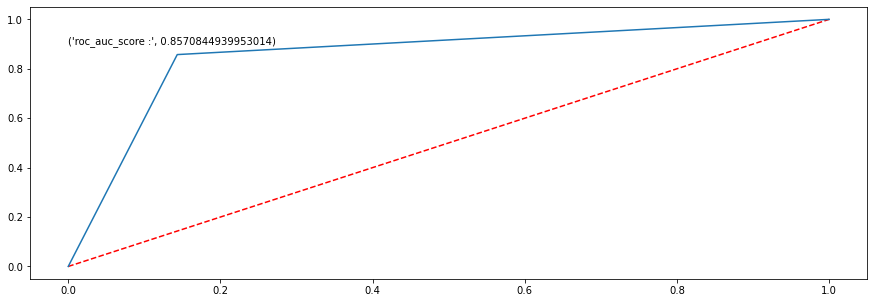

In [118]:
auc(bagging_mdl)

In [119]:
from sklearn import metrics
scores(bagging_mdl)

accuracy_score - 0.8570842263669114
f1_score - 0.8570385913694006
precision_score - 0.8566478205362028
recall_score - 0.857429718875502
cohen_kappa_score - 0.7141684830477801
roc_auc_score - 0.8570844939953014


In [120]:
model_8 = pd.DataFrame({'models':['bagging_mdl'],
                      'accuracy_score': [metrics.accuracy_score(y_test,y_predict)],
                      'f1_score':[metrics.f1_score(y_test,y_predict)],
                      'precision_score':[metrics.precision_score(y_test,y_predict)],
                      'recall_score':[metrics.recall_score(y_test,y_predict)],
                      'cohen_kappa_score':[metrics.cohen_kappa_score(y_test,y_predict)],
                      'roc_auc_score':[metrics.roc_auc_score(y_test,y_predict)]})

In [121]:
model_1 = model_1.append(model_8)
model_1

,models,accuracy_score,f1_score,precision_score,recall_score,cohen_kappa_score,roc_auc_score
0,suv_model_1,0.759360,0.785531,0.708037,0.882074,0.518811,0.759455
0,svc_model_2,0.850107,0.850625,0.847045,0.854235,0.700216,0.850110
0,svc_model_3,0.688677,0.654487,0.734522,0.590179,0.377259,0.688601
0,svc_model_poly,0.851065,0.852271,0.844781,0.859894,0.702134,0.851072
0,svc_model_poly_deg_2,0.848967,0.849304,0.846761,0.851862,0.697935,0.848969
0,logit,0.863104,0.863085,0.862534,0.863636,0.726207,0.863104
0,descion_tree_model,0.880843,0.888214,0.835897,0.947517,0.761710,0.880894
0,bagging_mdl,0.857084,0.857039,0.856648,0.857430,0.714168,0.857084


# MODEL - 9 ADABOOST

In [122]:
from sklearn.ensemble import AdaBoostClassifier

In [123]:
adaboost = AdaBoostClassifier()
adaboost = adaboost.fit(x_train,y_train)

In [124]:
y_predict = adaboost.predict(x_test)

In [125]:
y_predict = y_predicts(y_predict)

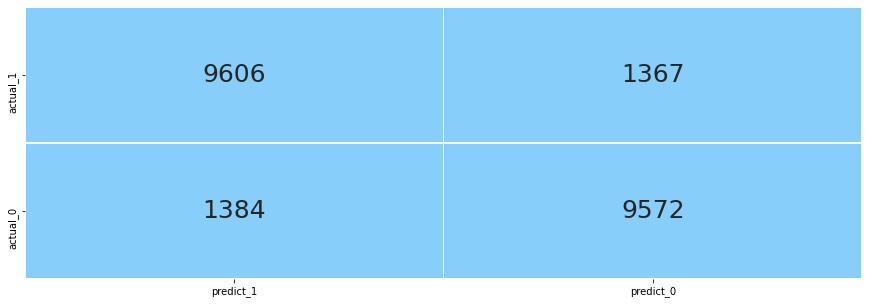

In [126]:
confuse_matrices(adaboost)

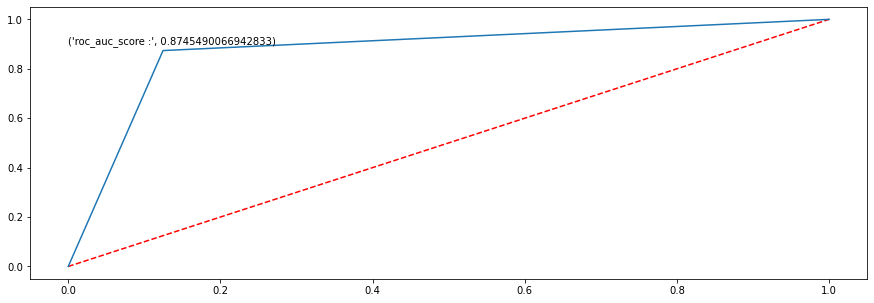

In [127]:
auc(adaboost)

In [128]:
from sklearn import metrics
scores(adaboost)

accuracy_score - 0.8745496830680833
f1_score - 0.8743548755423614
precision_score - 0.8750342810128897
recall_score - 0.8736765242789339
cohen_kappa_score - 0.749098913776387
roc_auc_score - 0.8745490066942833


In [129]:
model_9 = pd.DataFrame({'models':['adaboost'],
                      'accuracy_score': [metrics.accuracy_score(y_test,y_predict)],
                      'f1_score':[metrics.f1_score(y_test,y_predict)],
                      'precision_score':[metrics.precision_score(y_test,y_predict)],
                      'recall_score':[metrics.recall_score(y_test,y_predict)],
                      'cohen_kappa_score':[metrics.cohen_kappa_score(y_test,y_predict)],
                      'roc_auc_score':[metrics.roc_auc_score(y_test,y_predict)]})

In [130]:
model_1 = model_1.append(model_9)
model_1

,models,accuracy_score,f1_score,precision_score,recall_score,cohen_kappa_score,roc_auc_score
0,suv_model_1,0.759360,0.785531,0.708037,0.882074,0.518811,0.759455
0,svc_model_2,0.850107,0.850625,0.847045,0.854235,0.700216,0.850110
0,svc_model_3,0.688677,0.654487,0.734522,0.590179,0.377259,0.688601
0,svc_model_poly,0.851065,0.852271,0.844781,0.859894,0.702134,0.851072
0,svc_model_poly_deg_2,0.848967,0.849304,0.846761,0.851862,0.697935,0.848969
0,logit,0.863104,0.863085,0.862534,0.863636,0.726207,0.863104
0,descion_tree_model,0.880843,0.888214,0.835897,0.947517,0.761710,0.880894
0,bagging_mdl,0.857084,0.857039,0.856648,0.857430,0.714168,0.857084
0,adaboost,0.874550,0.874355,0.875034,0.873677,0.749099,0.874549


# MODEL - 9 K-NN

In [131]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors= 5,metric = 'minkowski')
knn_model = knn_model.fit(x_train,y_train)

In [132]:
y_predict = knn_model.predict(x_test)

In [133]:
y_predict = y_predicts(y_predict)

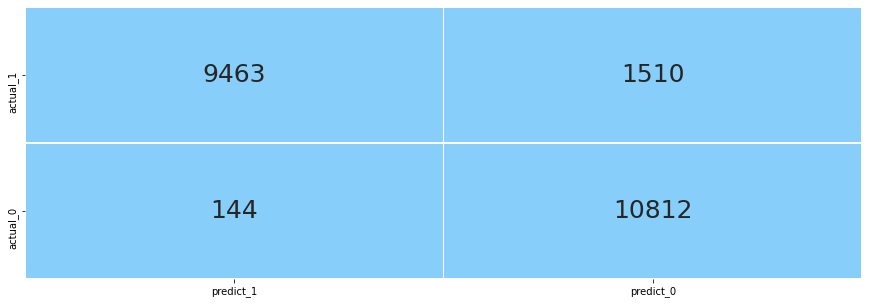

In [134]:
confuse_matrices(knn_model)

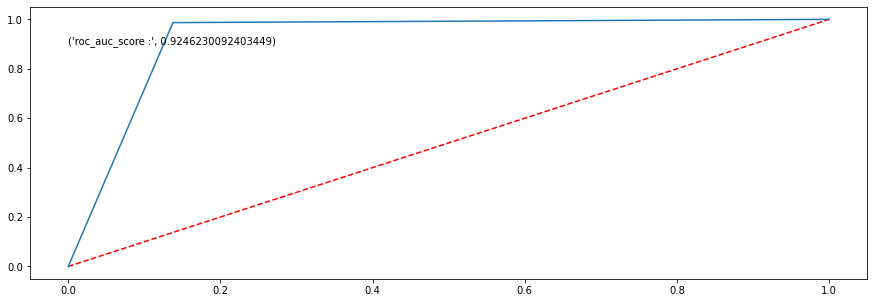

In [135]:
auc(knn_model)

In [136]:
from sklearn import metrics
scores(knn_model)

accuracy_score - 0.9245747640111268
f1_score - 0.9289457857204227
precision_score - 0.8774549586106152
recall_score - 0.9868565169769989
cohen_kappa_score - 0.849164005272848
roc_auc_score - 0.9246230092403449


In [137]:
model_10 = pd.DataFrame({'models':['knn_model'],
                      'accuracy_score': [metrics.accuracy_score(y_test,y_predict)],
                      'f1_score':[metrics.f1_score(y_test,y_predict)],
                      'precision_score':[metrics.precision_score(y_test,y_predict)],
                      'recall_score':[metrics.recall_score(y_test,y_predict)],
                      'cohen_kappa_score':[metrics.cohen_kappa_score(y_test,y_predict)],
                      'roc_auc_score':[metrics.roc_auc_score(y_test,y_predict)]})

In [138]:
model_1 = model_1.append(model_10)

In [139]:
model_1

,models,accuracy_score,f1_score,precision_score,recall_score,cohen_kappa_score,roc_auc_score
0,suv_model_1,0.759360,0.785531,0.708037,0.882074,0.518811,0.759455
0,svc_model_2,0.850107,0.850625,0.847045,0.854235,0.700216,0.850110
0,svc_model_3,0.688677,0.654487,0.734522,0.590179,0.377259,0.688601
0,svc_model_poly,0.851065,0.852271,0.844781,0.859894,0.702134,0.851072
0,svc_model_poly_deg_2,0.848967,0.849304,0.846761,0.851862,0.697935,0.848969
0,logit,0.863104,0.863085,0.862534,0.863636,0.726207,0.863104
0,descion_tree_model,0.880843,0.888214,0.835897,0.947517,0.761710,0.880894
0,bagging_mdl,0.857084,0.857039,0.856648,0.857430,0.714168,0.857084
0,adaboost,0.874550,0.874355,0.875034,0.873677,0.749099,0.874549
0,knn_model,0.924575,0.928946,0.877455,0.986857,0.849164,0.924623
